DEEP LEARNING

LAB-9

PRANSHU PARATE

202211063

SMS spam detection dataset using simple RNN

In [ ]:
#importing packages
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the dataset
data = pd.read_csv('/content/SPAM text message 20170820 - Data.csv', encoding='latin-1')

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.isnull().any()

Category    False
Message     False
dtype: bool

In [ ]:
texts = data['Message'].values
labels = data['Category'].values

In [ ]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
# Pad the sequences
maxlen = 50
X = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
# Convert labels to binary
y = np.array(labels == 'spam').astype(int)

In [ ]:
# Split the data into training and testing sets
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]
num_validation_samples = int(0.2 * len(X))
X_train = X[:-num_validation_samples]
y_train = y[:-num_validation_samples]
X_test = X[-num_validation_samples:]
y_test = y[-num_validation_samples:]

In [ ]:
# Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(10000, 32))
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
56/56 [==============================] - 5s 28ms/step - loss: 0.4079 - acc: 0.8595 - val_loss: 0.3298 - val_acc: 0.8823
Epoch 2/10
56/56 [==============================] - 2s 37ms/step - loss: 0.2656 - acc: 0.8999 - val_loss: 0.2356 - val_acc: 0.9148
Epoch 3/10
56/56 [==============================] - 1s 22ms/step - loss: 0.1363 - acc: 0.9591 - val_loss: 0.1893 - val_acc: 0.9260
Epoch 4/10
56/56 [==============================] - 1s 20ms/step - loss: 0.1080 - acc: 0.9652 - val_loss: 0.1736 - val_acc: 0.9428
Epoch 5/10
56/56 [==============================] - 1s 20ms/step - loss: 0.0507 - acc: 0.9893 - val_loss: 0.2803 - val_acc: 0.8789
Epoch 6/10
56/56 [==============================] - 1s 21ms/step - loss: 0.0457 - acc: 0.9863 - val_loss: 0.1276 - val_acc: 0.9496
Epoch 7/10
56/56 [==============================] - 1s 20ms/step - loss: 0.0301 - acc: 0.9924 - val_loss: 0.1015 - val_acc: 0.9630
Epoch 8/10
56/56 [==============================] - 2s 28ms/step - loss: 0.0150 - a

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

35/35 [==============================] - 0s 6ms/step - loss: 0.2151 - acc: 0.9443
Test accuracy: 0.944344699382782


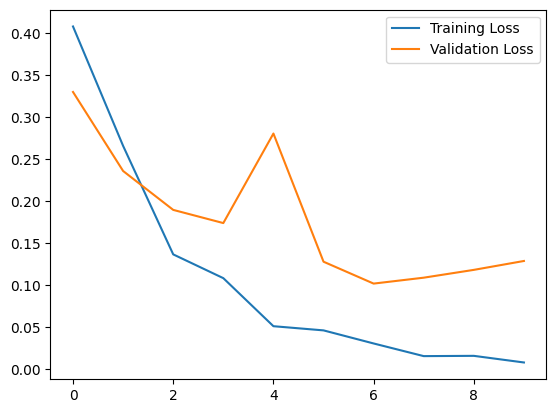

In [ ]:
# Plot loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Perform object detection using YOLOv5 on Blood Cell Detection Dataset

In [1]:
#import packages
import pandas as pd
import numpy as np
import os

In [2]:
#mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the dataset
annotation = pd.read_csv("/content/drive/MyDrive/blood_cell_detection/annotations.csv")
annotation.head()

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc


In [4]:
images = annotation.image.unique()
#test_images = annotation_test.image.unique()

In [5]:
train_images = images[:70]
test_images = images[70:]

In [6]:
yolo_train_dir = "/kaggle/working/yolo/train"
yolo_test_dir = "/kaggle/working/yolo/test"

for dd in [yolo_train_dir, yolo_test_dir]:
    for ss in ["images", "labels"]:
        print(os.path.join(dd, ss))
        os.makedirs(os.path.join(dd, ss), exist_ok=True)

/kaggle/working/yolo/train/images
/kaggle/working/yolo/train/labels
/kaggle/working/yolo/test/images
/kaggle/working/yolo/test/labels


In [7]:
#import libraries
import glob
from tqdm import tqdm
import os
import cv2
import matplotlib.pyplot as plt

(256, 256, 3)


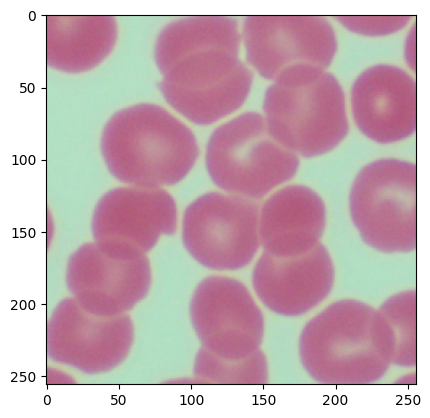

In [8]:
image = cv2.imread('/content/drive/MyDrive/blood_cell_detection/images/image-10.png')
image = image[:,:,2::-1]
print(image.shape)
plt.imshow(image)

In [9]:
WIDTH = 256
HEIGHT = 256
cells_id = {
    'rbc': 0,
    'wbc': 1
}

In [10]:
cells_classes = list(cells_id.keys())
cells_classes

['rbc', 'wbc']

In [11]:
for image in train_images:
    lables_file = os.path.join(yolo_train_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.image == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))
        
for image in test_images:
    lables_file = os.path.join(yolo_test_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.image == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))

In [12]:
SIZE_W = 640
SIZE_H = 640

In [13]:
SIZE = (SIZE_W, SIZE_H)

def replace_image(src_file, dst_file, size=SIZE):
    image = cv2.imread(src_file) 
    image = cv2.resize(image, size)
    cv2.imwrite(dst_file, image)

In [14]:
import os
import cv2

def replace_image(src_file, dst_file, size=(416, 416)):
    if not os.path.exists(src_file):
        print(f"Source file {src_file} does not exist!")
        return
    
    image = cv2.imread(src_file)
    if image is None:
        print(f"Failed to read image from file {src_file}!")
        return
    
    if image.size == 0:
        print(f"Image from file {src_file} has zero size!")
        return
    
    print(f"Resizing image from {image.shape} to {size}")
    image = cv2.resize(image, size)
    cv2.imwrite(dst_file, image)

In [15]:
train_images_dir = "/content/drive/MyDrive/blood_cell_detection/images"

for image in train_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(yolo_train_dir, 'images', image)
    replace_image(src_file, dst_file)
        
for image in test_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(yolo_test_dir, 'images', image)
    replace_image(src_file, dst_file)

Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (416, 416)
Resizing image from (256, 256, 3) to (41

/kaggle/working/yolo/train/images/image-100.png
/kaggle/working/yolo/train/labels/image-100.txt


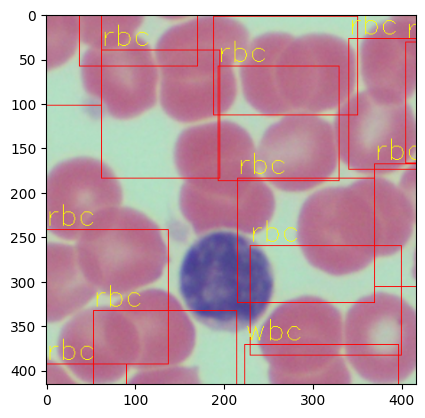

In [17]:
def draw_image(image_file, label_file, class_names):   
    image = cv2.imread(image_file)
        
    with open(label_file) as fobj:
        while True:            
            item = fobj.readline()
            if item is None or len(item)<=0:
                break
                
            item = item.split()
            
            lb = int(item[0])
            xc = float(item[1]) * SIZE_W
            yc = float(item[2]) * SIZE_H
            w = float(item[3]) * SIZE_W
            h = float(item[4]) * SIZE_H
        
            image = cv2.rectangle(image, (int(xc - w/2), int(yc - h/2)), (int(xc + w/2), int(yc + h/2)), (0,0,255), 1)
            image = cv2.putText(image, class_names[lb], (int(xc - w/2), int(yc - h/2 - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 255, 255), 1)
        
    return image

train_file = train_images[0]
image_file = os.path.join(yolo_train_dir, 'images', train_file)
label_file = os.path.join(yolo_train_dir, 'labels', train_file.replace(".png", ".txt"))

print(image_file)
print(label_file)

image = draw_image(image_file, label_file, cells_classes)
image = image[:,:,2::-1]
plt.imshow(image);


In [18]:
#cloning of git repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

#installation of requirements 
%pip install -r requirements.txt
%cd -

Cloning into 'yolov5'...
remote: Enumerating objects: 15598, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 15598 (delta 98), reused 119 (delta 57), pack-reused 15393
Receiving objects: 100% (15598/15598), 14.64 MiB | 17.95 MiB/s, done.
Resolving deltas: 100% (10622/10622), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
/content


In [19]:
!cat yolov5/data/coco128.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license
# COCO128 dataset https://www.kaggle.com/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)


# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128  # dataset root dir
train: images/train2017  # train images (relative to 'path') 128 images
val: images/train2017  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handb

In [20]:
yaml_file="yolov5/data/blood_cell.yaml"
train_images_dir = os.path.join("..", yolo_train_dir, "images")
val_images_dir = os.path.join("..", yolo_test_dir, "images")


names_str=""
for item in cells_classes:
    names_str=names_str + ", \'%s\'"%item
names_str= "names: ["+names_str[1:]+"]"

with open(yaml_file, "w") as wobj:
    wobj.write("train: %s\n"%train_images_dir)
    wobj.write("val: %s\n"%val_images_dir)
    wobj.write("nc: %d\n"%len(cells_classes))
    wobj.write(names_str+"\n")

In [22]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 27.4 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=81b8af19c156cf488c6eb45616c44816f31c01a94abee51b7da785e9969198e8
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [23]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [24]:
%cd yolov5
!bash weights/download_weights.sh

/content/yolov5
bash: weights/download_weights.sh: No such file or directory


In [25]:
!mv *.pt weights
!ls weights

mv: cannot stat '*.pt': No such file or directory
ls: cannot access 'weights': No such file or directory


In [26]:
!python train.py --data data/blood_cell.yaml --batch-size 4 --epochs 300 --img-size 640 --project runs/train --name blood_cell --weights weights/yolov5s.pt --device 0

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: paratepranshu (pp1063). Use `wandb login --relogin` to force relogin
train: weights=weights/yolov5s.pt, cfg=, data=data/blood_cell.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=blood_cell, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed

In [42]:
!ls -l runs/detect/exp

total 660
-rw-r--r-- 1 root root 674830 Apr 27 18:33 val_batch2_pred.jpg


In [43]:
img = cv2.imread("/content/yolov5/runs/detect/exp/val_batch2_pred.jpg")
plt.imshow(img[:,:,2::-1]);

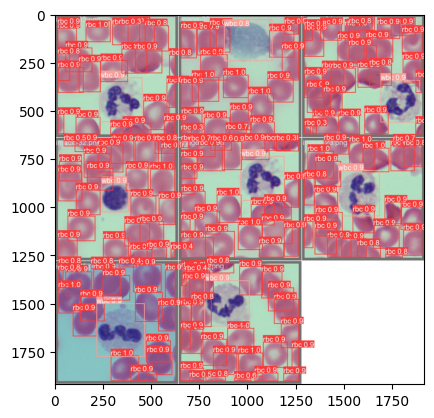

In [37]:
img = cv2.imread("/content/yolov5/runs/train/blood_cell/val_batch2_pred.jpg")
plt.imshow(img[:,:,2::-1]);

In [44]:
import torch

model = torch.hub.load('/content/yolov5', 'custom', path='runs/train/blood_cell/weights/best.pt', source='local')
# Images
imgs = ['/content/yolov5/runs/train/blood_cell/val_batch2_pred.jpg']  # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0] 

YOLOv5 🚀 v7.0-155-g8ecc727 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs


requirements: /content/requirements.txt not found, check failed.


Adding AutoShape... 
image 1/1: 1920x1920 92 rbcs
Speed: 57.0ms pre-process, 11.7ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to runs/detect/exp2


,xmin,ymin,xmax,ymax,confidence,class,name
0,1117.311523,339.278259,1242.813843,461.823212,0.848213,0,rbc
1,743.069214,337.549774,855.377319,456.410248,0.821804,0,rbc
2,8.572912,1126.155273,127.337219,1266.921021,0.801669,0,rbc
3,492.592651,801.945435,629.608215,921.075562,0.797119,0,rbc
4,949.241638,1081.924683,1072.351562,1214.807251,0.791171,0,rbc
...,...,...,...,...,...,...,...
87,1363.046265,630.363831,1521.756348,746.183533,0.286981,0,rbc
88,0.865339,151.987061,126.534462,341.151184,0.284163,0,rbc
89,1871.726807,529.036926,1919.604492,646.539368,0.274143,0,rbc
90,1114.834473,86.863518,1247.092529,224.315399,0.253767,0,rbc
